# Linguistic Networks. Lab 2.

#### Anastasia Romanova

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from IPython.display import Image
import community

In [2]:
print (nx.__version__)

1.11


# Les Miserables

First of all, we need to load a dataset to analyze. The first dataset is Les Miserables: coappearance network of characters in the novel Les Miserables. [D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)]

In [3]:
filename = 'lesmis.gml'
G = nx.read_gml(filename)

In [4]:
num_nodes = G.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))

The number of nodes: 77


As you can we the graph consists of 77 nodes. We can plot it now.

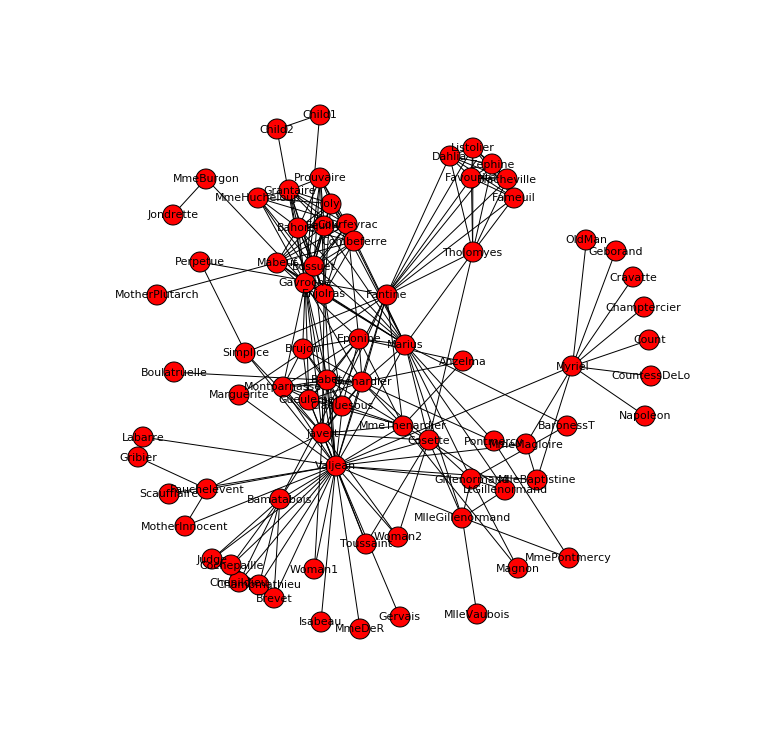

In [5]:
plt.figure(figsize=(10,10))
nx.draw(G,with_labels=True,node_size=400,font_size=11)

What can we say by analyzing the plot? We see that some of the characters are more tied to some others, we also observe some characters on periphery who probably are mentioned in the book just once or a few times. <br>
So we can make a kind of hypothesis, that the main characters (Jean Valijean, Fantine, Enjolras, Gavroche, Cossette, Eponine, etc) have more ties to each other and other characers, on the other hand, some episodic characters (Napoleon, Child, Woman, etc).

### Graph cliques

Now we can compute the number of cliques.

In [6]:
print(nx.graph_number_of_cliques(G))

59


We have 59 cliques. So let's have a look at them.

In [7]:
cl=list(nx.find_cliques(G)) 
#print(cl)
print(sorted(cl, key=len, reverse=True))

[['Courfeyrac', 'Gavroche', 'Bahorel', 'Enjolras', 'Bossuet', 'Joly', 'Feuilly', 'Combeferre', 'Marius', 'Mabeuf'], ['Courfeyrac', 'Gavroche', 'Bahorel', 'Enjolras', 'Bossuet', 'Joly', 'Feuilly', 'Combeferre', 'Prouvaire', 'Grantaire'], ['Blacheville', 'Dahlia', 'Listolier', 'Tholomyes', 'Fameuil', 'Favourite', 'Zephine', 'Fantine'], ['Courfeyrac', 'Gavroche', 'Bahorel', 'Enjolras', 'Bossuet', 'Joly', 'MmeHucheloup', 'Grantaire'], ['Brujon', 'Gueulemer', 'Babet', 'Thenardier', 'Montparnasse', 'Claquesous', 'Eponine'], ['Valjean', 'Brevet', 'Cochepaille', 'Champmathieu', 'Bamatabois', 'Chenildieu', 'Judge'], ['Valjean', 'Javert', 'Thenardier', 'Gueulemer', 'Babet', 'Gavroche', 'Montparnasse'], ['Valjean', 'Javert', 'Thenardier', 'Gueulemer', 'Babet', 'Claquesous', 'MmeThenardier'], ['Valjean', 'Javert', 'Thenardier', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse'], ['Brujon', 'Gueulemer', 'Babet', 'Thenardier', 'Montparnasse', 'Gavroche'], ['Eponine', 'Thenardier', 'Gueulemer', 'Cla

We can also find the largest clique.

In [8]:
print (nx.graph_clique_number(G))

10


The biggest clique consists of 10 nodes. If we look at the cliques above we can notice that there are two cliques of size 10. Let's plot them both!

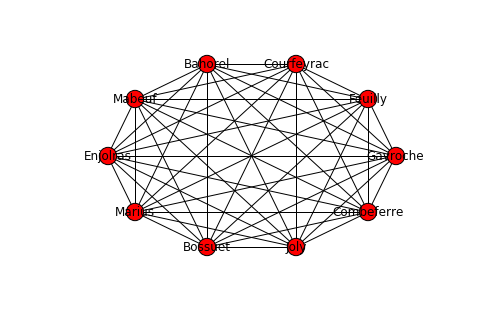

In [9]:
Gcl = G.subgraph(sorted(cl, key=len, reverse=True)[0])
nx.draw_circular(Gcl,with_labels=True)

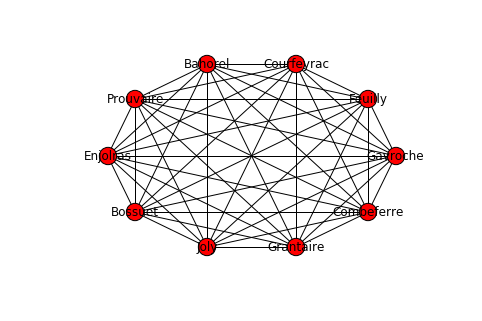

In [10]:
Gcl = G.subgraph(sorted(cl, key=len, reverse=True)[1])
nx.draw_circular(Gcl,with_labels=True)

Cliques are the most tied groups of nodes. In our case both cliques include some of the main characters but not all of them.

### Graph cores ans shells

Let's print each node and the sheel it belongs to.

In [11]:
cores=nx.core_number(G)
print(cores)

{'Blacheville': 7, 'LtGillenormand': 4, 'Courfeyrac': 9, 'Isabeau': 1, 'Thenardier': 8, 'Anzelma': 3, 'Favourite': 7, 'MotherPlutarch': 1, 'Jondrette': 1, 'Simplice': 3, 'Scaufflaire': 1, 'Gervais': 1, 'MlleBaptistine': 3, 'BaronessT': 2, 'MmeMagloire': 3, 'Boulatruelle': 1, 'Labarre': 1, 'MlleGillenormand': 4, 'OldMan': 1, 'Pontmercy': 2, 'Napoleon': 1, 'MmeBurgon': 1, 'Bahorel': 9, 'Child2': 2, 'Judge': 6, 'Brujon': 7, 'Feuilly': 9, 'Listolier': 7, 'Gillenormand': 4, 'MlleVaubois': 1, 'Champtercier': 1, 'Toussaint': 3, 'Babet': 8, 'Perpetue': 2, 'Enjolras': 9, 'Champmathieu': 6, 'Chenildieu': 6, 'Grantaire': 9, 'Javert': 8, 'MmeHucheloup': 7, 'Woman1': 2, 'Gueulemer': 8, 'Eponine': 8, 'Geborand': 1, 'MotherInnocent': 2, 'Cosette': 6, 'Marius': 9, 'Marguerite': 2, 'Gribier': 1, 'MmeDeR': 1, 'CountessDeLo': 1, 'Mabeuf': 9, 'Fantine': 7, 'Fauchelevent': 2, 'Fameuil': 7, 'Magnon': 2, 'Valjean': 8, 'Gavroche': 9, 'MmePontmercy': 2, 'Brevet': 6, 'Prouvaire': 9, 'Myriel': 3, 'Cochepaille': 

We'll sort the shells to see what shells have the biggest number of edges.

In [12]:
print(sorted(cores.items(), key=lambda x: x[1], reverse=True))

[('Courfeyrac', 9), ('Bahorel', 9), ('Feuilly', 9), ('Enjolras', 9), ('Grantaire', 9), ('Marius', 9), ('Mabeuf', 9), ('Gavroche', 9), ('Prouvaire', 9), ('Bossuet', 9), ('Combeferre', 9), ('Joly', 9), ('Thenardier', 8), ('Babet', 8), ('Javert', 8), ('Gueulemer', 8), ('Eponine', 8), ('Valjean', 8), ('Claquesous', 8), ('Montparnasse', 8), ('Blacheville', 7), ('Favourite', 7), ('Brujon', 7), ('Listolier', 7), ('MmeHucheloup', 7), ('Fantine', 7), ('Fameuil', 7), ('Dahlia', 7), ('Zephine', 7), ('Tholomyes', 7), ('MmeThenardier', 7), ('Judge', 6), ('Champmathieu', 6), ('Chenildieu', 6), ('Cosette', 6), ('Brevet', 6), ('Cochepaille', 6), ('Bamatabois', 6), ('LtGillenormand', 4), ('MlleGillenormand', 4), ('Gillenormand', 4), ('Anzelma', 3), ('Simplice', 3), ('MlleBaptistine', 3), ('MmeMagloire', 3), ('Toussaint', 3), ('Myriel', 3), ('Woman2', 3), ('BaronessT', 2), ('Pontmercy', 2), ('Child2', 2), ('Perpetue', 2), ('Woman1', 2), ('MotherInnocent', 2), ('Marguerite', 2), ('Fauchelevent', 2), ('Ma

In [13]:
cores.values()

dict_values([7, 4, 9, 1, 8, 3, 7, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 4, 1, 2, 1, 1, 9, 2, 6, 7, 9, 7, 4, 1, 1, 3, 8, 2, 9, 6, 6, 9, 8, 7, 2, 8, 8, 1, 2, 6, 9, 2, 1, 1, 1, 9, 7, 2, 7, 2, 8, 9, 2, 6, 9, 3, 6, 9, 7, 7, 3, 7, 1, 1, 9, 2, 8, 7, 6, 9, 8])

So now we can plot the graph based on the colors of shells.

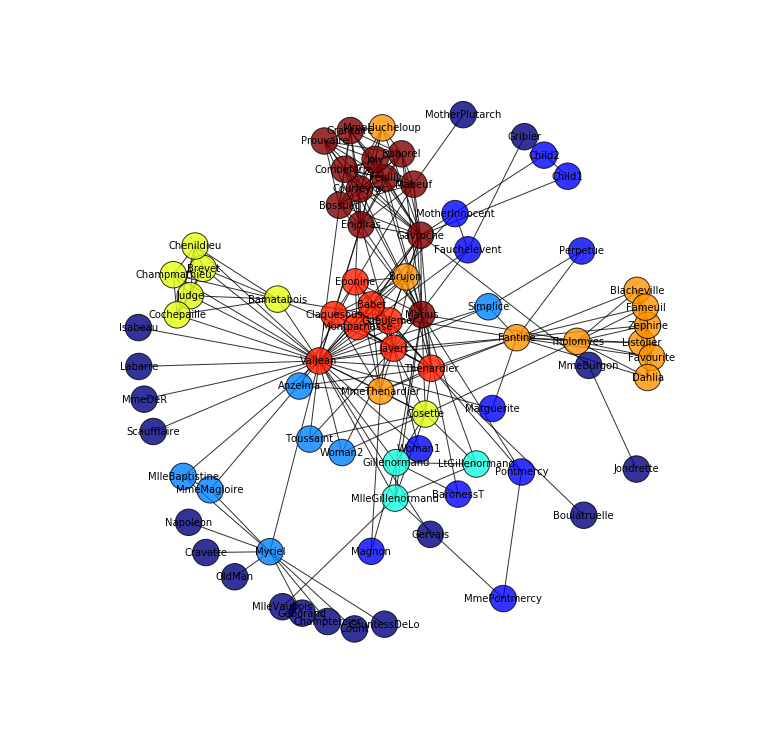

In [14]:
values = [cores.get(node) for node in G.nodes()]
plt.figure(figsize=(10,10))
nx.draw(G,with_labels=True, node_color=values, node_size=700, font_size=10, alpha=0.8)

Let's find the shell that is the largest one according to the biggest number of edges that each node has.

In [15]:
print(max(cores.values()))

9


As you see in the largest shell is 9. Thus, in the other two largest shells are 8 and 7 respectively. Let's take a closer look at these shells.

In [16]:
print("The most largest shell is: ", list(nx.k_shell(G,9)), '\n')
print("The second largest shell is: ", list(nx.k_shell(G,8)), '\n')
print("The third largest shell is: ", list(nx.k_shell(G,7)), '\n')

The most largest shell is:  ['Gavroche', 'Courfeyrac', 'Bahorel', 'Prouvaire', 'Marius', 'Feuilly', 'Mabeuf', 'Enjolras', 'Bossuet', 'Joly', 'Grantaire', 'Combeferre'] 

The second largest shell is:  ['Gueulemer', 'Babet', 'Eponine', 'Thenardier', 'Claquesous', 'Montparnasse', 'Javert', 'Valjean'] 

The third largest shell is:  ['Blacheville', 'MmeHucheloup', 'Listolier', 'Fantine', 'Favourite', 'Fameuil', 'Dahlia', 'Tholomyes', 'Zephine', 'Brujon', 'MmeThenardier'] 



This is the time to plot these shells!

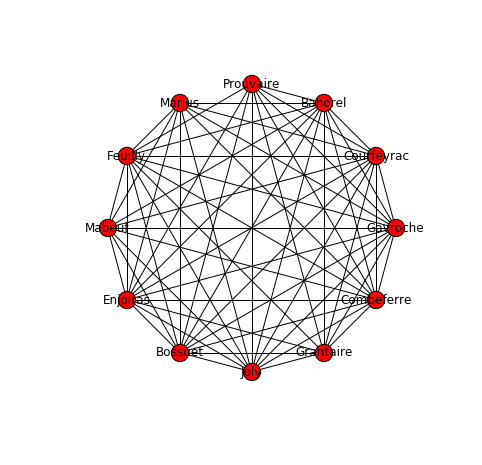

In [17]:
Gkc = G.subgraph(nx.k_shell(G,9))
plt.figure(figsize=(6,6))
nx.draw_circular(Gkc,with_labels=True,node_color="red")

We also can see some of the same characters who are tied to each other, who co-appereance in the book.

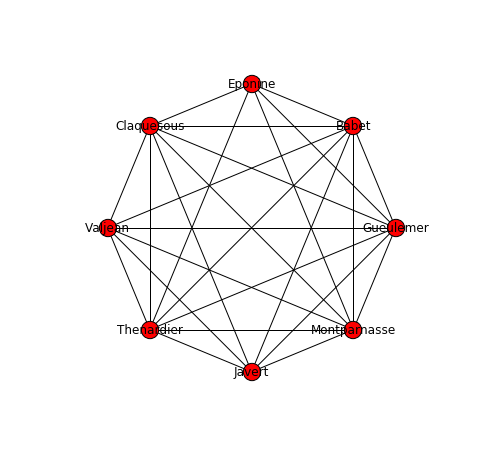

In [18]:
Gkc = G.subgraph(nx.k_shell(G,8))
plt.figure(figsize=(6,6))
nx.draw_circular(Gkc,with_labels=True,node_color="red")

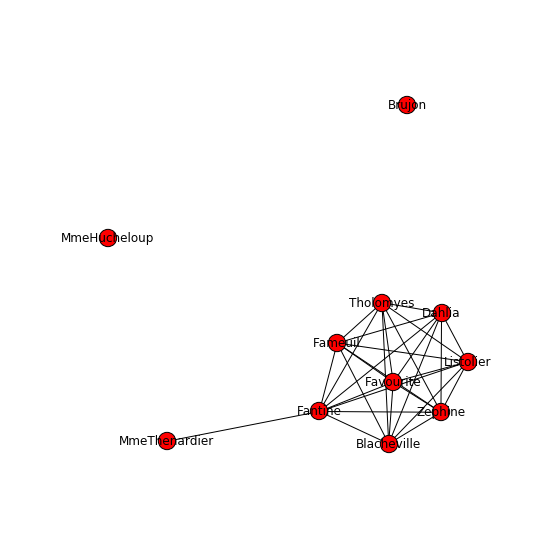

In [19]:
Gkc = G.subgraph(nx.k_shell(G,7))
plt.figure(figsize=(7,7))
nx.draw(Gkc,with_labels=True, node_color="red")

### Network Communities

In [21]:
partition = community.best_partition(G)

In [22]:
for i in set(partition.values()):
    print ("Community", i)
    print ([nodes for nodes in partition.keys() if partition[nodes] == i])

Community 0
['Blacheville', 'Listolier', 'Simplice', 'Perpetue', 'Zephine', 'Tholomyes', 'Favourite', 'Fantine', 'Fameuil', 'Dahlia']
Community 1
['LtGillenormand', 'MmePontmercy', 'Magnon', 'MlleGillenormand', 'Pontmercy', 'MlleVaubois', 'BaronessT', 'Gillenormand']
Community 2
['Jondrette', 'MmeBurgon']
Community 3
['Isabeau', 'Scaufflaire', 'Chenildieu', 'Gribier', 'MmeDeR', 'Champmathieu', 'Brevet', 'Cochepaille', 'Bamatabois', 'Gervais', 'Labarre', 'Judge', 'MotherInnocent', 'Marguerite', 'Fauchelevent', 'Valjean']
Community 4
['Brujon', 'Toussaint', 'Babet', 'Javert', 'Woman1', 'MmeThenardier', 'Montparnasse', 'Anzelma', 'Boulatruelle', 'Thenardier', 'Gueulemer', 'Eponine', 'Cosette', 'Woman2', 'Claquesous']
Community 5
['Enjolras', 'Grantaire', 'Bossuet', 'Gavroche', 'Courfeyrac', 'MotherPlutarch', 'Bahorel', 'Child2', 'Feuilly', 'Child1', 'Combeferre', 'MmeHucheloup', 'Marius', 'Mabeuf', 'Prouvaire', 'Joly']
Community 6
['Champtercier', 'Count', 'Myriel', 'MmeMagloire', 'OldMan

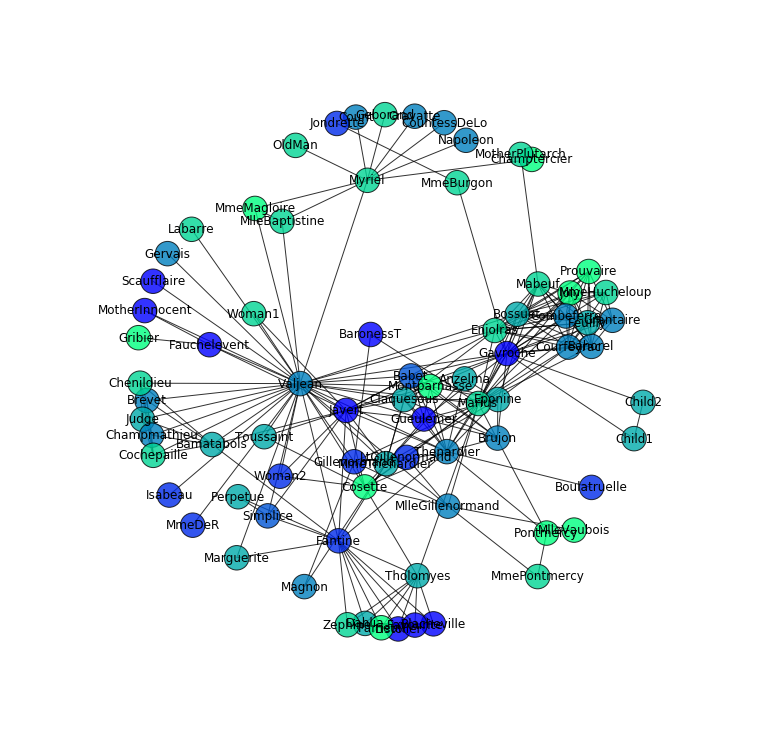

In [23]:
plt.figure(figsize=(10,10))
nx.draw(G, cmap = plt.get_cmap('winter'), node_color = list(partition.values()), node_size=600, alpha=0.8,with_labels=True)

In [24]:
community.modularity(partition,G)

0.552738855477711

It's interesting to see communities in our network. They are grouped not like the main characters and others, they are split into a few different categories.

### Transativity

Just for reminder: Transitivity of a relation means that when there is a tie from i to j, and also from j to h, then there is also a tie from i to h. Transitivity depends on triads, subgraphs formed by 3 nodes.
The nx.transitivity function uses the nx.triangles function to compute the ratio of the number of triangles to the number of possible triangles. If transitivity is high, so the nodes are more connected to each other, there are more triangles.

In [25]:
print(nx.transitivity(G))

0.49893162393162394


Transativity is not very high, so it means that there are not so many triads in the network.

# Arxiv GR-QC

In [26]:
Ga = nx.read_adjlist("ca-GrQc.txt")

In [27]:
num_nodes = Ga.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))

The number of nodes: 5242


The graph is very big. Let's plot it to understand that it's useless to analyze the whole graph.

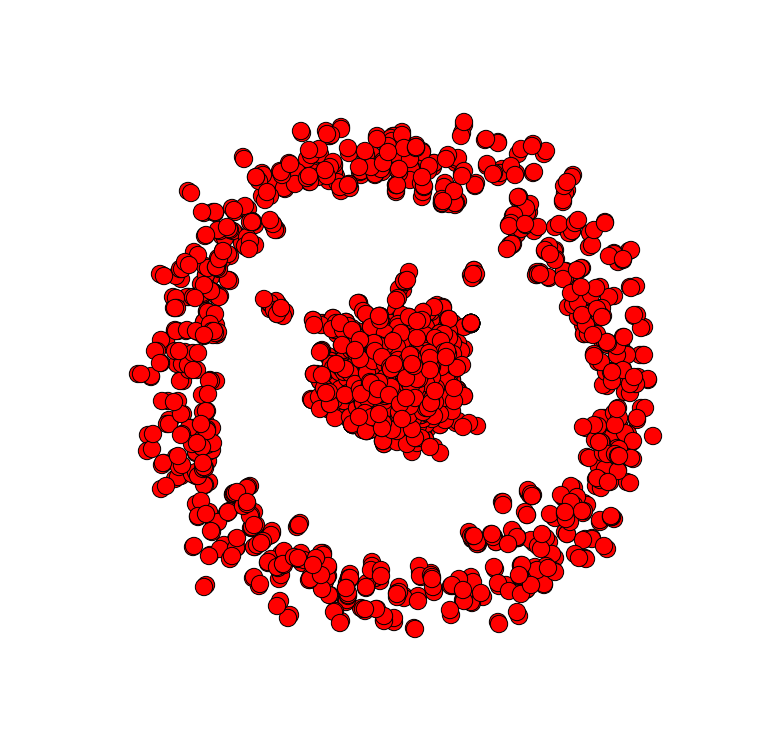

In [28]:
plt.figure(figsize=(10,10))
nx.draw(Ga,with_labels=False,node_size=300)

Yes, as I said previously the graph is to big to analyze. So we can find its components if it makes any sense.

In [29]:
sub_graph = nx.connected_component_subgraphs(Ga)
components = []
for I in sub_graph:
    components.append(I)
print(len(components))
components.sort(key=nx.number_of_nodes, reverse=True)

355


It turned out there are 355 connected components in the graph. If we want to look at first two components, we need to print their info.

In [30]:
I1 = components[0]
print(nx.info(I1))

Name: 
Type: Graph
Number of nodes: 4158
Number of edges: 13428
Average degree:   6.4589


In [31]:
I2 = components[1]
print(nx.info(I2))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 29
Average degree:   4.1429


The first connected components is also big enough, the second is much smaller than the previous one. We'll keep working with these two components.
Our next step is to plot these two components. To distinguish them further we can follow a simple colour rule:
the first component is always RED,
the second is always BLUE.
We need to make such a split just to save our time. 

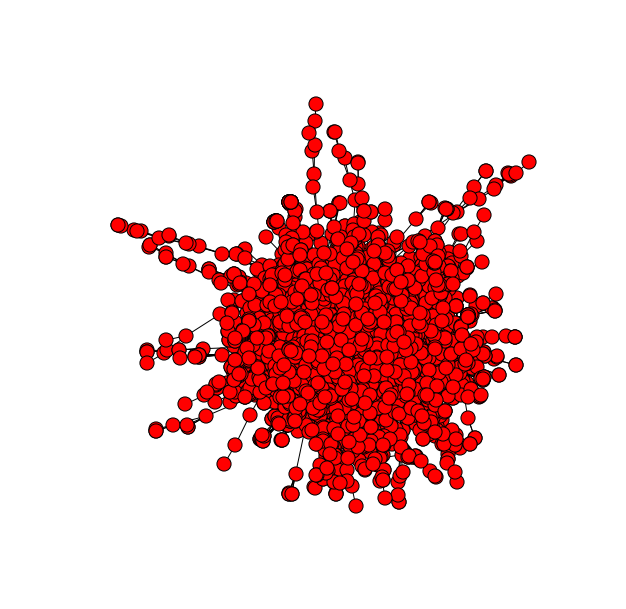

In [32]:
plt.figure(figsize=(8,8))
nx.draw(I1,with_labels=False,node_size=200)

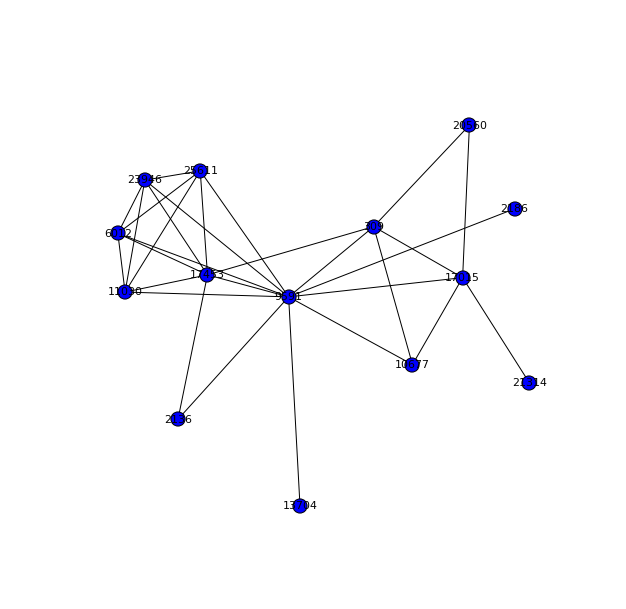

In [34]:
plt.figure(figsize=(8,8))
nx.draw(I2,with_labels=True,font_size=11, node_size=200, node_color="blue")

The second component plot is much easier to read and understand. We even can find cliques without any calculations. 

### Graph cliques

For the next step let's find cliques for both components.

In [35]:
print("The cliques of the first component are", nx.graph_number_of_cliques(I1))
print("The cliques of the second component are", nx.graph_number_of_cliques(I2))

The cliques of the first component are 3385
The cliques of the second component are 8


In [36]:
cl1=list(nx.find_cliques(I1)) 
print("Five biggest cliques of the fisrt component:",sorted(cl1, key=len, reverse=True)[:5])
print("-----------------------")
cl2=list(nx.find_cliques(I2))
print("Five biggest cliques of the second component:",sorted(cl2, key=len, reverse=True)[:5])

Five biggest cliques of the fisrt component: [['21012', '22691', '773', '14807', '3372', '21847', '24955', '2741', '22887', '11472', '2952', '25346', '1653', '20635', '15003', '570', '18894', '23293', '45', '12365', '14540', '6179', '20108', '2212', '17692', '12496', '12781', '11241', '8879', '4164', '19423', '21508', '6610', '20562', '9785', '17655', '6830', '25758', '12851', '7956', '4513', '21281', '19961', '15659'], ['21012', '46', '22887', '11472', '2952', '25346', '21847', '1653', '20635', '15003', '570', '18894', '23293', '12365', '773', '14540', '6179', '20108', '25758', '4511', '15659', '17692', '2212', '24955', '14807', '12781', '11241', '3372', '8879', '4164', '19423', '21508', '6610', '2741', '20562', '9785', '17655', '6830', '21281', '7956', '12496', '12851', '19961'], ['21012', '4511', '22887', '11472', '2952', '25346', '1653', '21847', '20635', '15003', '570', '18894', '23293', '45', '12365', '773', '14540', '6179', '20108', '25758', '15659', '17692', '2212', '14807', '2

Now we can find the length of the biggest clique for both components.

In [37]:
print("The biggest clique length of the first component is",nx.graph_clique_number(I1))
print("The biggest clique length of the second component is",nx.graph_clique_number(I2))

The biggest clique length of the first component is 44
The biggest clique length of the second component is 6


And finally we can plot them!

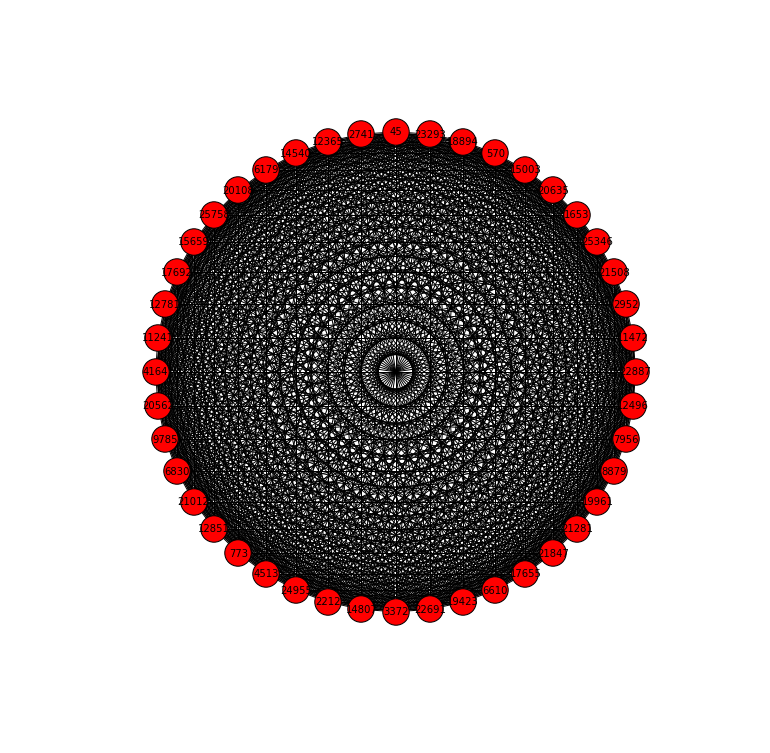

In [38]:
plt.figure(figsize=(10,10))
Gcl1 = I1.subgraph(sorted(cl1, key=len, reverse=True)[0])
nx.draw_circular(Gcl1,with_labels=True,font_size=10, node_size=700)

Alright, it looks beautiful..but we need to interpretate this graph. As each node has 43 edges to connect to the rest of nodes in the given clique, thus all the nodes in the clique are connected to each other. If each node represents a specific author and each edge represents the connection between co-authors (e.g. author 773 co-authored a paper with author 3372), so we observe the network of authors who co-work with each other. It's kind of a club of authours who collaborate on writing and publishing papers.

Ok, let's plot the biggest clique of the second component.

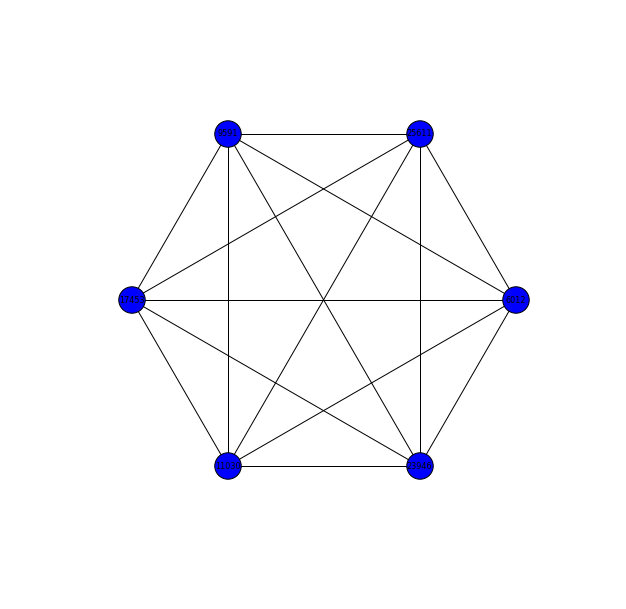

In [39]:
plt.figure(figsize=(8,8))
Gcl2 = I2.subgraph(sorted(cl2, key=len, reverse=True)[0])
nx.draw_circular(Gcl2,with_labels=True,font_size=8, node_size=700, node_color='blue')

This is another group of authors who co-athour papers with each other. 

### Graph cores ans shells

Now we'll find cores and shells for the first component.

In [40]:
I1.remove_edges_from(I1.selfloop_edges())

In [41]:
cores=nx.core_number(I1)
print(cores)

{'18870': 5, '16278': 3, '8876': 2, '11472': 43, '16020': 5, '22032': 13, '3292': 1, '13862': 3, '9433': 34, '3858': 3, '12149': 3, '358': 2, '19608': 2, '24696': 5, '3927': 2, '19783': 1, '1006': 2, '3323': 3, '15998': 3, '22462': 3, '15125': 3, '16334': 3, '2566': 2, '6907': 11, '9895': 1, '5497': 3, '21663': 1, '7094': 1, '16837': 1, '1782': 2, '15580': 5, '19697': 3, '11801': 5, '10246': 1, '930': 4, '6288': 6, '6527': 1, '193': 4, '231': 9, '4290': 1, '12645': 3, '11591': 5, '10983': 4, '5359': 1, '2003': 2, '21814': 2, '10062': 4, '9093': 1, '3418': 3, '16766': 3, '9597': 1, '178': 4, '16368': 4, '6858': 3, '10898': 2, '13682': 3, '14123': 4, '17746': 3, '16475': 2, '15325': 4, '12187': 3, '22791': 2, '6266': 3, '4261': 1, '22555': 5, '5729': 3, '16955': 3, '22051': 2, '18030': 3, '1511': 2, '6190': 4, '18397': 8, '23620': 4, '20432': 2, '4555': 2, '14869': 1, '20519': 3, '18952': 21, '22265': 4, '21549': 2, '4781': 3, '4870': 3, '7087': 4, '19084': 2, '22798': 4, '9863': 2, '122

In [42]:
print(sorted(cores.items(), key=lambda x: x[1], reverse=True))

[('11472', 43), ('19961', 43), ('21281', 43), ('25346', 43), ('15003', 43), ('12781', 43), ('19423', 43), ('25758', 43), ('22887', 43), ('12851', 43), ('570', 43), ('14807', 43), ('24955', 43), ('2741', 43), ('12496', 43), ('21847', 43), ('8879', 43), ('773', 43), ('6610', 43), ('14540', 43), ('6830', 43), ('3372', 43), ('6179', 43), ('2212', 43), ('2952', 43), ('20635', 43), ('7956', 43), ('21012', 43), ('1653', 43), ('12365', 43), ('17655', 43), ('15659', 43), ('22691', 43), ('45', 43), ('17692', 43), ('18894', 43), ('11241', 43), ('20562', 43), ('4513', 43), ('21508', 43), ('4164', 43), ('9785', 43), ('20108', 43), ('23293', 43), ('46', 42), ('4511', 42), ('9433', 34), ('6868', 34), ('22324', 34), ('18444', 34), ('14373', 34), ('24474', 34), ('2623', 34), ('7650', 34), ('3820', 34), ('26039', 34), ('13526', 34), ('15148', 34), ('14157', 34), ('3824', 34), ('17823', 34), ('17819', 34), ('13482', 34), ('18000', 34), ('8448', 34), ('3812', 34), ('17600', 34), ('7525', 34), ('1293', 34)

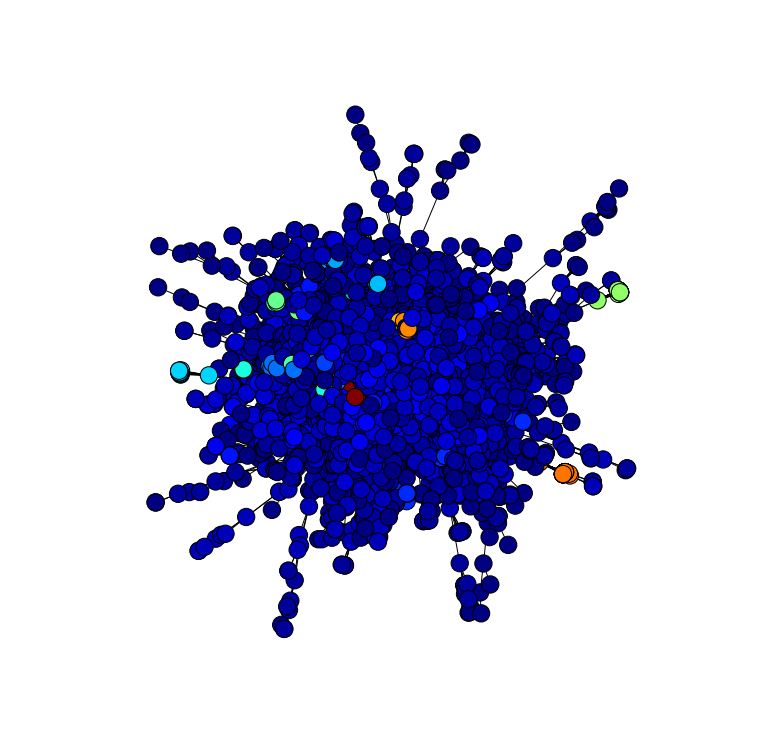

In [43]:
values = [cores.get(node) for node in I1.nodes()]
plt.figure(figsize=(10,10))
nx.draw(I1,with_labels=False, node_color=values, node_size=300)

In [44]:
for i in range(1,44): print (list(nx.k_core(I1,i)))

['18870', '16278', '8876', '11472', '16020', '22032', '13862', '9433', '3858', '12149', '358', '19608', '24696', '3927', '19783', '1006', '3323', '15998', '22462', '16334', '7459', '6907', '9895', '5497', '21663', '23464', '7094', '16837', '1782', '15580', '19697', '11801', '930', '6288', '6527', '193', '231', '4290', '12645', '11591', '10983', '5359', '2003', '21814', '10062', '9093', '3418', '16766', '9597', '178', '16368', '6858', '10898', '13682', '17746', '16475', '15325', '12187', '22791', '6266', '4261', '22555', '5729', '16955', '22051', '18030', '1511', '6190', '18397', '23620', '20432', '4555', '14869', '8503', '20519', '18952', '22265', '21549', '4781', '4870', '7087', '19084', '22798', '9863', '12247', '20435', '17135', '20052', '8045', '2922', '1353', '8116', '6732', '9138', '7802', '23863', '25272', '11791', '8211', '17290', '7615', '23458', '11223', '16649', '715', '12016', '4588', '14325', '16270', '18517', '4103', '1829', '365', '4446', '24814', '20155', '25911', '1532

In [45]:
for i in range(1,44): print (list(nx.k_shell(I1,i)))

['17309', '3851', '25872', '13653', '7885', '23727', '3292', '21657', '17934', '25204', '16216', '19783', '16065', '1985', '6390', '9895', '21663', '7094', '16837', '10763', '749', '17939', '18605', '8815', '23096', '23859', '15907', '21131', '6527', '17099', '25904', '15715', '13036', '403', '15191', '10388', '5359', '22023', '5601', '9093', '12157', '15419', '17924', '5241', '9597', '9721', '7857', '18784', '14414', '4261', '24122', '20341', '7103', '14869', '6726', '4836', '15977', '14664', '5636', '18152', '21017', '6380', '21695', '9486', '8193', '2356', '11806', '19356', '13385', '22190', '3607', '9138', '25272', '17290', '20915', '17988', '25219', '15626', '17589', '15200', '5360', '20515', '3194', '5061', '3845', '17850', '23490', '4000', '6878', '23135', '25601', '3173', '12644', '2352', '4712', '3999', '21811', '20317', '8877', '9419', '25719', '4554', '19495', '6702', '7452', '19445', '17251', '12665', '18742', '16945', '23909', '23227', '12045', '11213', '4625', '546', '143

In [46]:
print(max(cores.values()))

43


In [47]:
print("The most largest shell is: ", list(nx.k_shell(I1,43)), '\n')

The most largest shell is:  ['22887', '11472', '2952', '2741', '25346', '1653', '20635', '15003', '570', '18894', '23293', '45', '12365', '14540', '6179', '20108', '6610', '25758', '15659', '17692', '12781', '11241', '4164', '20562', '9785', '6830', '21012', '12851', '773', '4513', '24955', '2212', '14807', '3372', '8879', '19423', '21508', '17655', '21847', '21281', '19961', '22691', '7956', '12496'] 



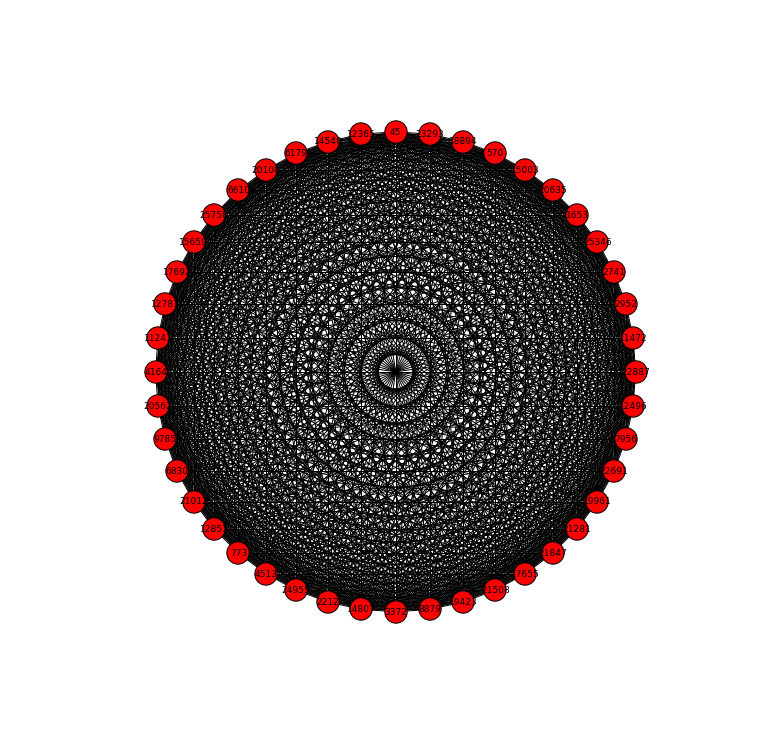

In [48]:
Gkc = Ga.subgraph(nx.k_shell(I1,43))
plt.figure(figsize=(10,10))
nx.draw_circular(Gkc,with_labels=True,font_size=9,node_color="red", node_size=500)

Let's do the same fo the second component.

In [49]:
cores=nx.core_number(I2)
print (cores)

{'6012': 5, '13704': 1, '2136': 2, '9591': 5, '20560': 2, '2186': 1, '17453': 5, '17015': 3, '11030': 5, '309': 3, '21314': 1, '10677': 3, '25611': 5, '23946': 5}


In [50]:
cores.values()

dict_values([5, 1, 2, 5, 2, 1, 5, 3, 5, 3, 1, 3, 5, 5])

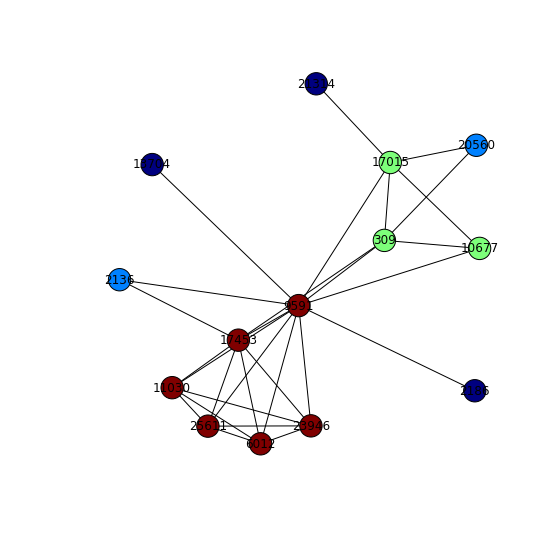

In [51]:
colors = [float(x) for x in cores.values()]
plt.figure(figsize=(7,7))
nx.draw(I2,with_labels=True, node_color=colors, node_size=500)

In [52]:
for i in range(1,6): print (list(nx.k_core(I2,i)))

['6012', '13704', '2136', '9591', '20560', '2186', '17453', '17015', '11030', '309', '21314', '10677', '25611', '23946']
['6012', '309', '2136', '10677', '25611', '9591', '20560', '17453', '11030', '17015', '23946']
['6012', '309', '10677', '25611', '9591', '17453', '11030', '17015', '23946']
['6012', '25611', '9591', '17453', '11030', '23946']
['6012', '25611', '9591', '17453', '11030', '23946']


In [53]:
for i in range(1,6): print (list(nx.k_shell(I2,i)))

['13704', '2186', '21314']
['20560', '2136']
['309', '17015', '10677']
[]
['6012', '25611', '9591', '17453', '11030', '23946']


In [54]:
max(cores.values())

5

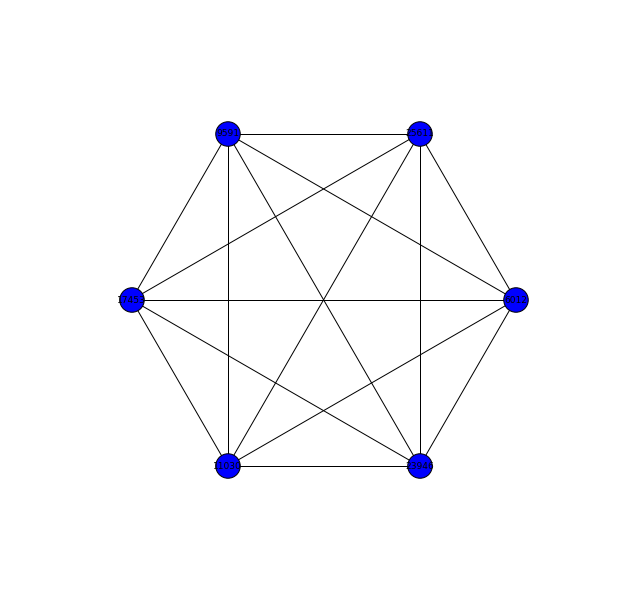

In [55]:
Gkc = Ga.subgraph(nx.k_shell(I2,5))
plt.figure(figsize=(8,8))
nx.draw_circular(Gkc,with_labels=True,font_size=9,node_color="blue", node_size=600)

### Network communities

Let's find communities inside our components

In [56]:
partition = community.best_partition(I1)

Let's check how many communities we have and print them all.

In [57]:
count=list(set([i for i in partition.values()]))
print(len(count))

38


In [58]:
for i in set(partition.values()):
    print ("Community", i)
    print ([nodes for nodes in partition.keys() if partition[nodes] == i])

Community 0
['18870', '2404', '4261', '21943', '1829', '23693', '7072', '869', '14357', '12927', '385', '4458', '4273', '17393', '24833', '5259', '409', '13813', '352', '16067', '3996', '851', '20064', '1098', '12642', '16070', '15479', '1982', '20533', '4490', '7935', '21695', '6175', '22225', '547', '8387', '20373', '2713', '2044', '4989', '18032', '1958', '3178', '5395', '25516', '6707', '23513', '22603', '16976', '17937', '3068', '122', '22031', '245', '24332', '20434', '18125', '1674', '934', '14647', '17999', '9092', '6911', '6859', '22224', '5547', '853', '14562', '5659', '13191', '11107', '1280', '543', '17228', '22493', '9593', '14991', '19434', '4825', '23686', '23614', '13480', '19206', '4836', '18314', '19675', '20062', '12849', '16087', '5445', '23944', '15250', '6264', '26196', '7024', '6530', '12887', '12478', '19447', '17231', '17309', '15311', '5848', '1229', '839', '16498', '7355', '7098', '19608', '25204', '16837', '11591', '6858', '23620', '22830', '14377', '21646',

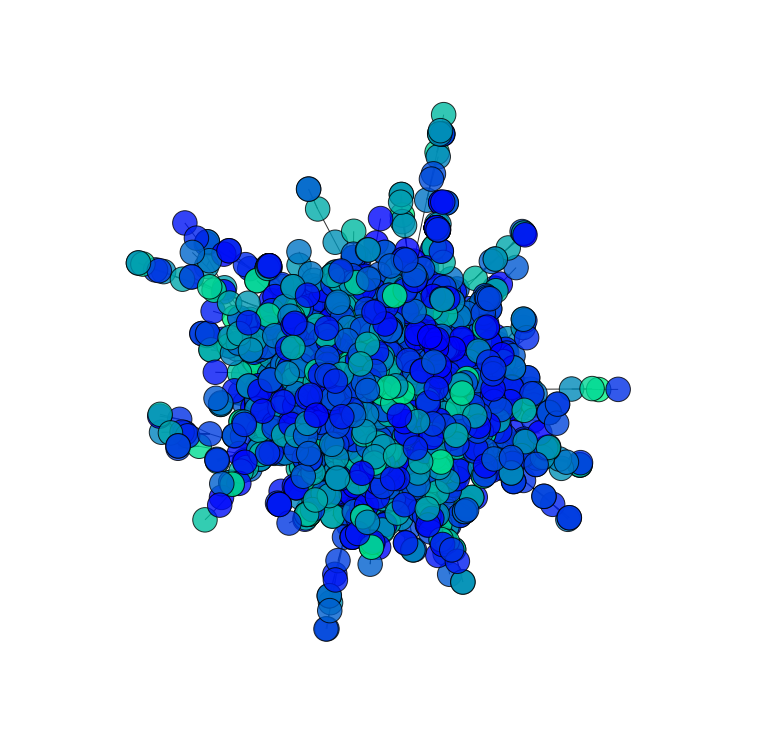

In [59]:
plt.figure(figsize=(10,10))
nx.draw(I1, cmap = plt.get_cmap('winter'), node_color = list(partition.values()), node_size=600, alpha=0.8,with_labels=False)

In [60]:
community.modularity(partition,I1)

0.8463290197522195

We'll also find communities for the second component

In [61]:
partition = community.best_partition(I2)

In [62]:
count=list(set([i for i in partition.values()]))
print(len(count))

3


In [63]:
for i in set(partition.values()):
    print ("Community", i)
    print ([nodes for nodes in partition.keys() if partition[nodes] == i])

Community 0
['6012', '17453', '11030', '25611', '23946']
Community 1
['13704', '2136', '9591', '2186']
Community 2
['20560', '17015', '309', '21314', '10677']


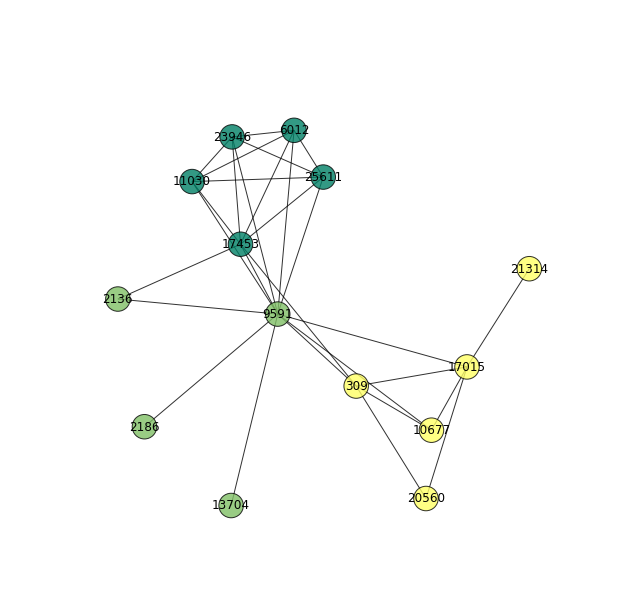

In [64]:
plt.figure(figsize=(8,8))
nx.draw(I2, cmap = plt.get_cmap('summer'), node_color = list(partition.values()), node_size=600, alpha=0.8,with_labels=True)

### Graph transitivity

Just for reminder: Transitivity of a relation means that when there is a tie from i to j, and also from j to h, then there is also a tie from i to h. Transitivity depends on triads, subgraphs formed by 3 nodes.
The nx.transitivity function uses the nx.triangles function to compute the ratio of the number of triangles to the number of possible triangles. If transitivity is high, so the nodes are more connected to each other, there are more triangles.
That's what we need because it's interesting to find - author I co-authored a paper with J, and also author J co-authored a paper with H, then author I might co-author author H.

In [65]:
print(nx.transitivity(I1))

0.6288944756689877


Transitivity for the first component is high, so it means that there are a lot of triangles (triads) of authors who co-authored a paper with each other.

In [66]:
print(nx.transitivity(I2))

0.574468085106383


Same for the second component.